# Day 1: EDA(Exploratory Data Analysis)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
#Loading dataframe
df = pd.read_excel('./data/ENB2012_data.xlsx')
df.columns = [
    'Relative Compactness',
    'Surface Area',
    'Wall Area',
    'Roof Area',
    'Overall Height',
    'Orientation',
    'Glazing Area',
    'Glazing Area Distribution',
    'Heating Load',
    'Cooling Load'
]
df.head(10)


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


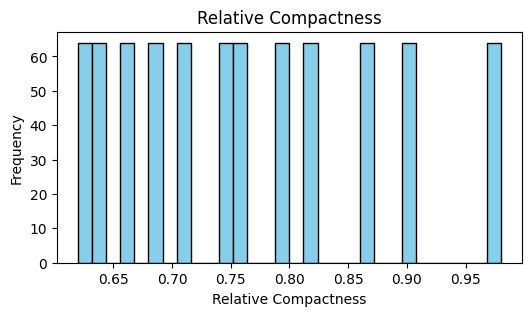

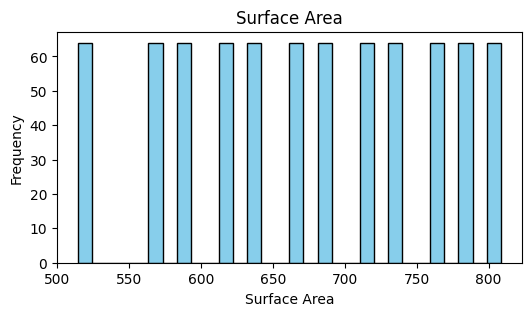

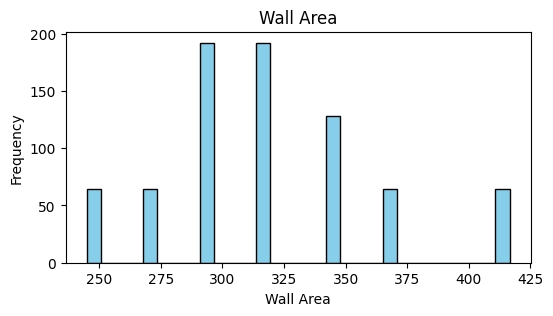

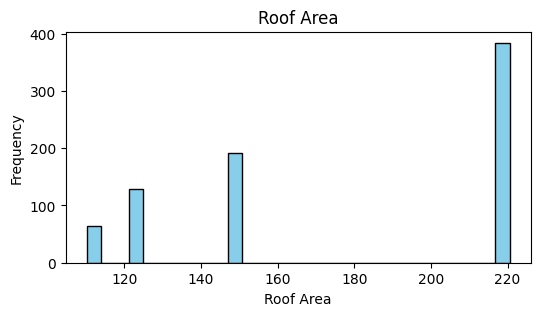

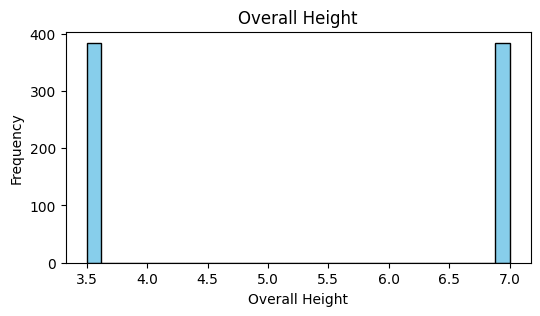

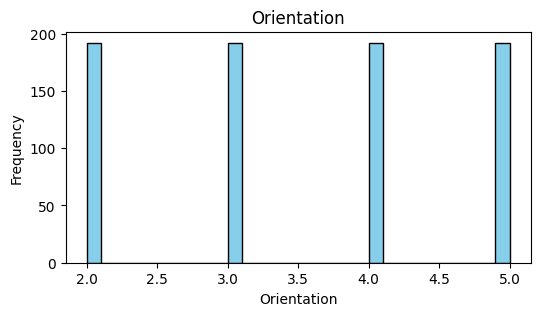

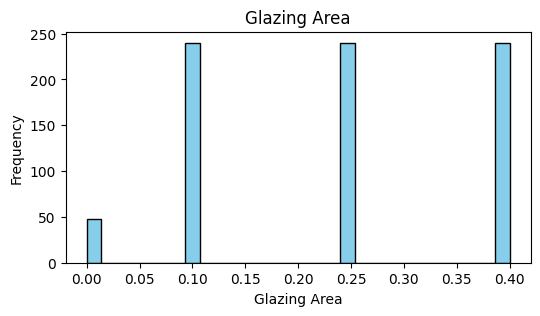

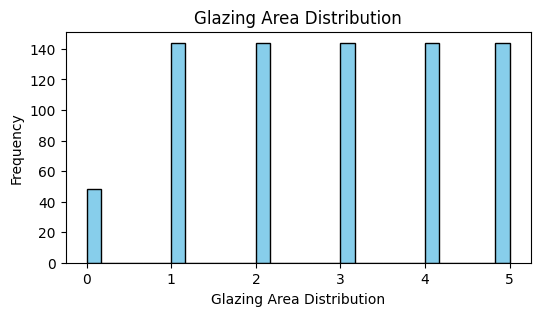

In [5]:
# Visual check (histogram)
numeric_cols = df.select_dtypes(include='number').columns.drop(['Heating Load', 'Cooling Load'])
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
# encoding
df_encoded = pd.get_dummies(df, columns=['Orientation', 'Glazing Area Distribution'], drop_first=True)
df_encoded

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load,Orientation_3,Orientation_4,Orientation_5,Glazing Area Distribution_1,Glazing Area Distribution_2,Glazing Area Distribution_3,Glazing Area Distribution_4,Glazing Area Distribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,False,False,False,False,False,False,False
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,True,False,False,False,False,False,False,False
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,True,False,False,False,False,False,False
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,False,True,False,False,False,False,False
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,17.88,21.40,False,False,True,False,False,False,False,True
764,0.62,808.5,367.5,220.50,3.5,0.4,16.54,16.88,False,False,False,False,False,False,False,True
765,0.62,808.5,367.5,220.50,3.5,0.4,16.44,17.11,True,False,False,False,False,False,False,True
766,0.62,808.5,367.5,220.50,3.5,0.4,16.48,16.61,False,True,False,False,False,False,False,True


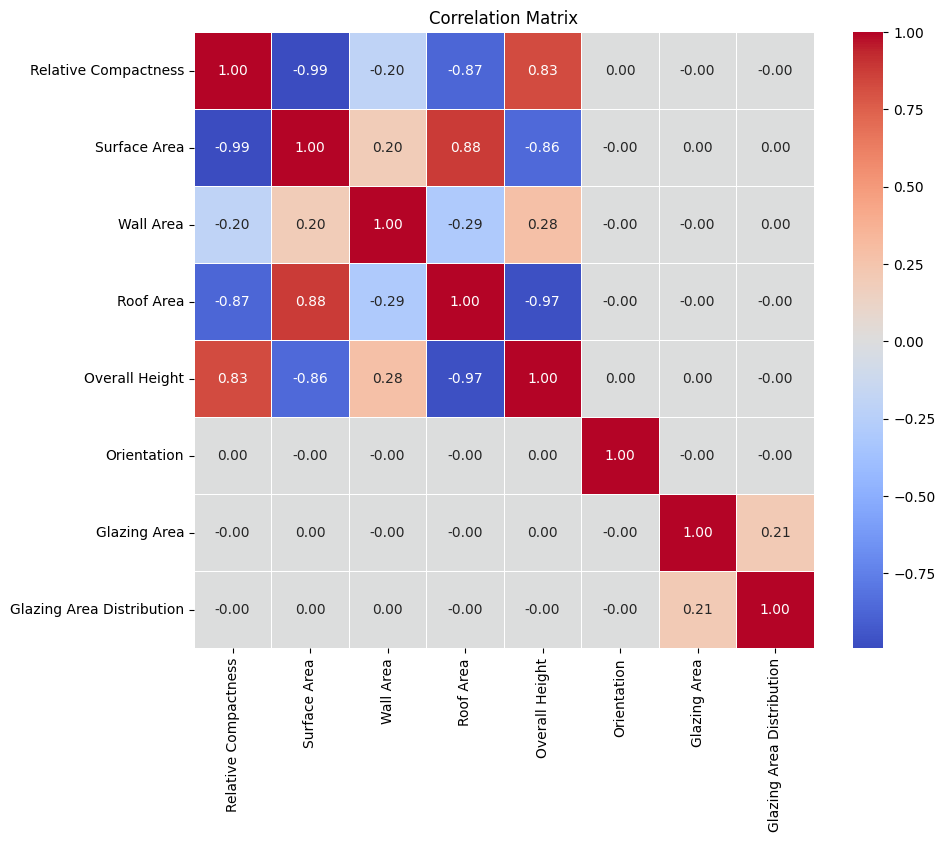

In [7]:
# Computing correlation matrix
corr_matrix = df.drop(columns=['Heating Load', 'Cooling Load']).corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [10]:
# model training class
class Model():
    def __init__(self, x, y, scale=True):
        self.X = x
        self.Y = y
        self.scaler = StandardScaler()
        self.scale = scale
    def split_and_scale(self):
        if self.scale:

            scaler = self.scaler

            # Initial train+temp split forr cooling
            X_train, X_temp, Y_train, Y_temp = train_test_split(
                self.X, self.Y, test_size=0.3, random_state=42
            )

            # Now splitting temp_col into validation and test (15% each)
            X_val, X_test, Y_val, Y_test = train_test_split(
                X_temp, Y_temp, test_size=0.5, random_state=42
            )

            #scaling
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_val_scaled = scaler.transform(X_val)
            X_test_scaled = scaler.transform(X_test)

            return {
                'X_train': X_train_scaled,
                'X_val': X_val_scaled,
                'X_test': X_test_scaled,
                'Y_test': Y_test,
                'Y_val': Y_val,
                'Y_train': Y_train
            }
        else:
            X_train, X_temp, Y_train, y_temp = train_test_split(
                self.X, self.Y, test_size=0.3, random_state=42
            )

            X_val, X_test, Y_val, Y_test = train_test_split(
                X_temp, y_temp, test_size=0.5, random_state=42
            )
            return {
                'X_train': X_train,
                'X_val': X_val,
                'X_test': X_test,
                'Y_test': Y_test,
                'Y_val': Y_val,
                'Y_train': Y_train
            }

    def train_and_evaluate(self, X_train, Y_train, X_val, Y_val, X_test, Y_test, model, cv=True):
        if cv:
            scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
            scores = -scores   #convert to positive MSE
            print(f'CV MSE scores: {scores}')
            print(f'Mean MSE: {np.mean(scores)}')

            model.fit(X_train, Y_train)

            Y_pred_val = model.predict(X_val)

            print('R_squared score:', r2_score(Y_val, Y_pred_val))
            print('MSE score', mean_squared_error(Y_val, Y_pred_val))
            print('MAE score', mean_absolute_error(Y_val, Y_pred_val))

            #Evaluate and return parameters
            return {
                'mse score': np.mean(scores),
                'R_squared score': r2_score(Y_val, Y_pred_val),
                'MSE score': mean_squared_error(Y_val, Y_pred_val),
                'MAE score': mean_absolute_error(Y_val, Y_pred_val),
                'model_name': model.__class__.__name__,  # name as string
                'model_obj': model,                      # actual model object
                'params': model.get_params()
            }

        else:
            model.fit(X_train, Y_train)
            Y_pred_val = model.predict(X_val)

            #printing result
            print('R_squared score:', r2_score(Y_val, Y_pred_val))
            print('MSE score', mean_squared_error(Y_val, Y_pred_val))
            print('MAE score', mean_absolute_error(Y_val, Y_pred_val))

            #Evaluate and return parameters
            return {
                'R_squared score': r2_score(Y_val, Y_pred_val),
                'MSE score': mean_squared_error(Y_val, Y_pred_val),
                'MAE score': mean_absolute_error(Y_val, Y_pred_val),
                'model_name': model.__class__.__name__,  # name as string
                'model_obj': model,                      # actual model object
                'params': model.get_params()
            }
    def run(self, model):
        data = self.split_and_scale()
        return self.train_and_evaluate(
            data['X_train'], data['Y_train'],
            data['X_val'] , data['Y_val'],
            data['X_test'], data['Y_test'], 
            model
        )
    
X = df_encoded.drop(columns=['Heating Load', 'Cooling Load'])
Y_col = df_encoded['Cooling Load']
Y_ht = df_encoded['Heating Load']
col_model = Model(X, Y_col)
ht_model = Model(X, Y_ht)

lr = LinearRegression()
ht_result = ht_model.run(lr)

CV MSE scores: [ 6.85187619 10.35841135  8.49981215  7.50629812  6.83743634]
Mean MSE: 8.010766827860888
R_squared score: 0.9060927067007929
MSE score 9.598741684621471
MAE score 2.2691041542234816
